<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/Hexagons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Python Example: Hexagons</h1></b>

Dr. Bingsen Wang

6/7/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
0


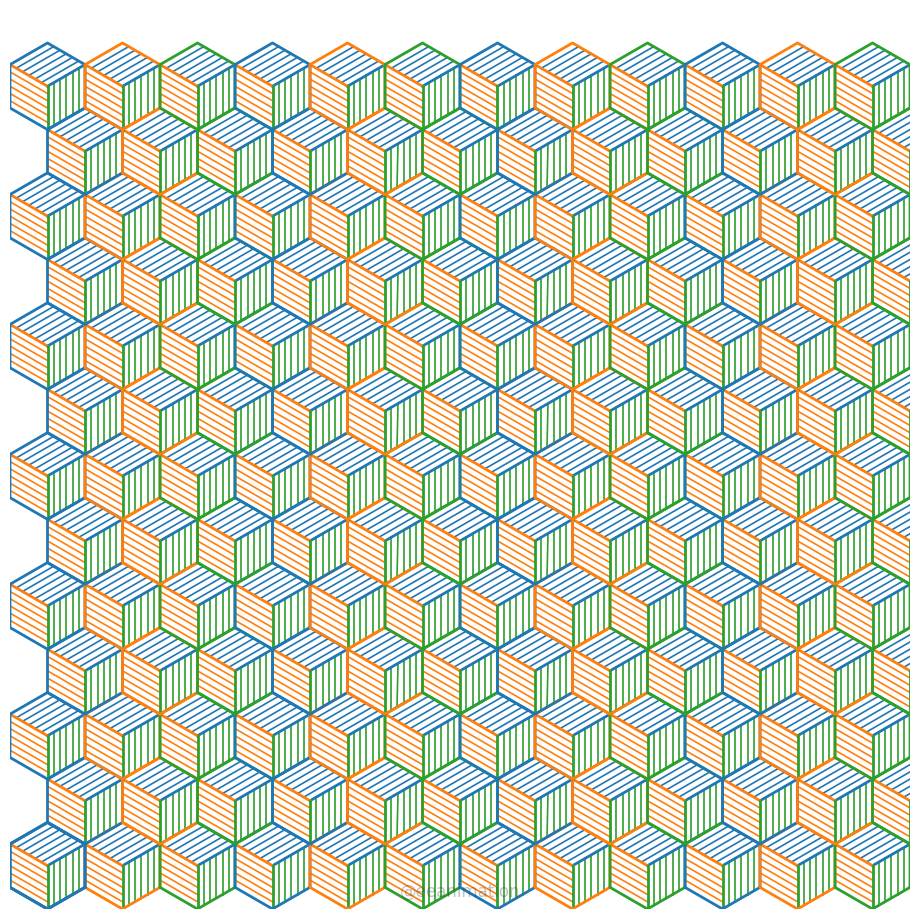

In [65]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def hex(ax,a,xy=(0,0),color='k'):
  pts=a*np.exp(1j*np.linspace(-np.pi/6,11*np.pi/6,7))+xy[0]+1j*xy[1]
  ax.plot(pts.real,pts.imag,color=color,lw=2)
  return
def hex_star(ax,a,xy=(0,0)):
  pts=a*np.exp(1j*np.linspace(np.pi/6,9*np.pi/6,3))
  for k in range(3):
    p=pts[k]
    ax.plot([xy[0],xy[0]+p.real],[xy[1],xy[1]+p.imag],lw=2,c=cl[k],zorder=-1)
  return
def hex_grid(ax,a,xy=(0,0),n=6):
  pts=a*np.exp(1j*np.linspace(np.pi/6,9*np.pi/6,3))
  for k in range(3):
    p=pts[k]
    for l in range(1,n):
      xy1=xy[0]+1j*xy[1]+pts[(k+1)%3]/n*l
      ax.plot([xy1.real,(xy1+p).real],[xy1.imag,(xy1+p).imag],lw=1.2,c=cl[k],zorder=-2)
  return

cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xlim=ylim=[-1,1]
nc=12;w=(xlim[1]-xlim[0])/nc;r=w/np.cos(np.pi/6)/2;nr=int(np.ceil(1/r))+2
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim,fc='none'); ax.axis('off')

def animate(i):
  if i%50==0:    print(i)
  kk=i//(nc*nr);ii=i%(nc*nr); k=ii//nc;l=ii%nc
  if kk==0:
    hex(ax,r,color=cl[(k*nc+l)%3],xy=(xlim[0]+w*(.5+l+.5*(k%2)),ylim[0]+r*(1+k*1.5)))
  if kk==1:
    hex_star(ax,r,xy=(xlim[0]+w*(.5+l+.5*(k%2)),ylim[0]+r*(1+k*1.5)))
  if kk==2:
    hex_grid(ax,r,xy=(xlim[0]+w*(.5+l+.5*(k%2)),ylim[0]+r*(1+k*1.5)))
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=3*nc*nr, interval=20)
anim.save("hexagons.mp4",writer=animation.FFMpegWriter(fps=40),dpi=200)